In [118]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import sklearn
import sklearn.preprocessing
import os
import matplotlib.pyplot as plt
import math

In [119]:
csv_data = pd.read_csv('climate_clean.csv', index_col=0)

csv_data['Datum'] = pd.to_datetime(csv_data['Datum'])
csv_data.describe()

,Windgeschw Max,Windgeschw Mittel,Niederschlag,Niederschlagsform,Sonnenstunden,Schneehoehe,Bedeckungsgrad,Dampfdruck Mittel,Luftdruck Mittel,Lufttemp Mittel,Relative Feuchte,Lufttemp Max,Lufttemp Min,Lufttemp Min Erdboden
count,41272.000000,41272.000000,41272.000000,41272.000000,41272.000000,41272.000000,41272.000000,41272.000000,41272.000000,41272.000000,41272.000000,41272.000000,41272.000000,41272.000000
mean,-0.563684,-0.852494,-0.955561,2.141064,-0.626977,-0.979950,0.339642,-0.800839,-0.008593,0.197568,0.545691,0.275287,0.127789,0.092258
std,0.197634,0.078658,0.090362,2.718331,0.349836,0.059778,0.569118,0.076497,0.008600,0.135471,0.233100,0.157096,0.122663,0.124756
min,-0.940000,-0.996000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-0.976000,-0.057200,-0.316000,-0.620000,-0.256000,-0.408000,-0.540000
25%,-0.712000,-0.916000,-1.000000,0.000000,-0.958333,-1.000000,0.000000,-0.862000,-0.013300,0.098000,0.400000,0.157500,0.040000,0.004000
50%,-0.596000,-0.868000,-0.998000,1.000000,-0.708333,-1.000000,0.450000,-0.810000,-0.007000,0.202000,0.560000,0.276000,0.134000,0.098000
75%,-0.444000,-0.788000,-0.950000,6.000000,-0.375000,-1.000000,0.825000,-0.746000,-0.003700,0.300000,0.720000,0.392000,0.222000,0.190000
max,0.668000,-0.432000,0.360000,8.000000,0.341667,-0.140000,1.000000,-0.480000,0.021000,0.592000,1.000000,0.744000,0.490000,0.436000


In [120]:
print(csv_data.loc[0])

Datum                    1891-01-01 00:00:00
Windgeschw Max                        -0.232
Windgeschw Mittel                     -0.844
Niederschlag                              -1
Niederschlagsform                          0
Sonnenstunden                           -0.9
Schneehoehe                            -0.92
Bedeckungsgrad                            -1
Dampfdruck Mittel                     -0.914
Luftdruck Mittel                      0.0028
Lufttemp Mittel                       -0.072
Relative Feuchte                        0.76
Lufttemp Max                            0.01
Lufttemp Min                          -0.118
Lufttemp Min Erdboden                  0.032
Name: 0, dtype: object


### Convert pandas DataFrame to np array

In [121]:
# 'Niederschlagsform' from categorical to one hot
nm_onehot_df = pd.get_dummies(csv_data['Niederschlagsform'])
nm_onehot_df.columns = ['Niederschlagsform_{}'.format(i) for i in [0, 1, 4, 6, 7, 8, 9]]

modified_data = pd.concat([csv_data, nm_onehot_df], axis=1).drop('Niederschlagsform', axis=1)

In [122]:
# 'Datum' to (day of the year) and (year)
modified_data['Datum_DOY'] = modified_data['Datum'].dt.dayofyear
modified_data['Jahr'] = modified_data['Datum'].dt.year
modified_data.drop('Datum', axis=1, inplace=True)

modified_data['Datum_DOY'] /= 183
modified_data['Datum_DOY'] -= 1

year_scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
modified_data['Jahr'] = year_scaler.fit_transform(modified_data[['Jahr']])

/usr/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [123]:
modified_data

,Windgeschw Max,Windgeschw Mittel,Niederschlag,Sonnenstunden,Schneehoehe,Bedeckungsgrad,Dampfdruck Mittel,Luftdruck Mittel,Lufttemp Mittel,Relative Feuchte,...,Lufttemp Min Erdboden,Niederschlagsform_0,Niederschlagsform_1,Niederschlagsform_4,Niederschlagsform_6,Niederschlagsform_7,Niederschlagsform_8,Niederschlagsform_9,Datum_DOY,Jahr
0,-0.232,-0.844,-1.000,-0.900000,-0.92,-1.000,-0.914,0.00280,-0.072,0.7600,...,0.032,1,0,0,0,0,0,0,-0.994536,-1.0
1,-0.600,-0.876,-1.000,-0.950000,-0.96,-0.325,-0.918,-0.01620,-0.056,0.6800,...,-0.070,1,0,0,0,0,0,0,-0.989071,-1.0
2,-0.360,-0.928,-0.950,-1.000000,-0.86,-0.075,-0.922,-0.00990,-0.004,0.3800,...,-0.116,0,1,0,0,0,0,0,-0.983607,-1.0
3,-0.360,-0.948,-0.836,-0.883333,-0.88,1.000,-0.872,-0.00600,0.036,0.8000,...,-0.170,0,1,0,0,0,0,0,-0.978142,-1.0
4,-0.440,-0.820,-0.962,-0.933333,-0.90,0.925,-0.906,-0.01060,-0.050,0.7400,...,-0.072,0,1,0,0,0,0,0,-0.972678,-1.0
5,-0.328,-0.808,-0.950,-0.900000,-0.92,1.000,-0.930,-0.01440,-0.116,0.7600,...,0.012,0,1,0,0,0,0,0,-0.967213,-1.0
6,-0.680,-0.868,-0.942,-0.958333,-0.92,1.000,-0.928,-0.00840,-0.116,0.8800,...,0.072,0,1,0,0,0,0,0,-0.961749,-1.0
7,-0.720,-0.608,-1.000,-1.000000,-0.96,0.675,-0.926,0.00080,-0.100,0.7800,...,0.074,1,0,0,0,0,0,0,-0.956284,-1.0
8,-0.696,-0.672,-1.000,-1.000000,-0.90,0.675,-0.942,-0.00110,-0.156,0.7400,...,0.072,1,0,0,0,0,0,0,-0.950820,-1.0
9,-0.780,-0.728,-1.000,-0.958333,-0.90,-0.075,-0.958,-0.01450,-0.228,0.7000,...,0.006,1,0,0,0,0,0,0,-0.945355,-1.0


In [126]:
# Conver to np array
raw_np_data = modified_data.values

print(raw_np_data.shape)
raw_np_data[0]

(41272, 22)


array([-0.232     , -0.844     , -1.        , -0.9       , -0.92      ,
       -1.        , -0.914     ,  0.0028    , -0.072     ,  0.76      ,
        0.01      , -0.118     ,  0.032     ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.99453552, -1.        ])

### Set up train/test split and batches

In [146]:
last_year = csv_data['Datum'].dt.year.iloc[-1]
TEST_YEAR_LENGTH = 4

split_index = (csv_data['Datum'].dt.year >= last_year - TEST_YEAR_LENGTH + 1).idxmax()

train_data = raw_np_data[:split_index, :]
test_data = raw_np_data[split_index:, :]

print(train_data.shape, test_data.shape)

(39811, 22) (1461, 22)


In [160]:
# return value will have shape (batch_size, n_features, series_length)
def generate_batch(data, batch_size, series_length):
    start_indices = np.random.randint(0, len(data) - series_length + 1, size=batch_size)
    result = np.ndarray(shape=(batch_size, 22, series_length))
    
    for batch in range(batch_size):
        start = start_indices[batch]
        for i in range(series_length):
            result[batch, :, i] = data[i+start]
            
    return result

generate_batch(train_data, 1, 2)

array([[[-8.32000000e-01, -8.00000000e-01],
        [-7.80000000e-01, -7.80000000e-01],
        [-9.56000000e-01, -9.38000000e-01],
        [-1.00000000e+00, -8.66666667e-01],
        [-1.00000000e+00, -1.00000000e+00],
        [ 1.00000000e+00,  7.50000000e-01],
        [-7.92000000e-01, -7.94000000e-01],
        [-1.00000000e-04,  7.00000000e-04],
        [ 1.84000000e-01,  1.94000000e-01],
        [ 8.00000000e-01,  7.20000000e-01],
        [ 1.98000000e-01,  2.14000000e-01],
        [ 1.30000000e-01,  1.52000000e-01],
        [ 1.30000000e-01,  7.00000000e-02],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 1.00000000e+00,  1.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 7.59562842e-01,  7.65027322e-01],
        [-1.02362205e-01, -1.02362205e-01]]])

### Create simple model

In [128]:
FEATURES = 22

model = keras.models.Sequential()

model.add(keras.layers.LSTM(64, dropout=0.1, recurrent_dropout=0.1))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(FEATURES, activation='softmax'))

model.build((None, FEATURES, 1))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

model.summary()



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 22)                2838      
Total params: 28,054
Trainable params: 28,054
Non-trainable params: 0
_________________________________________________________________


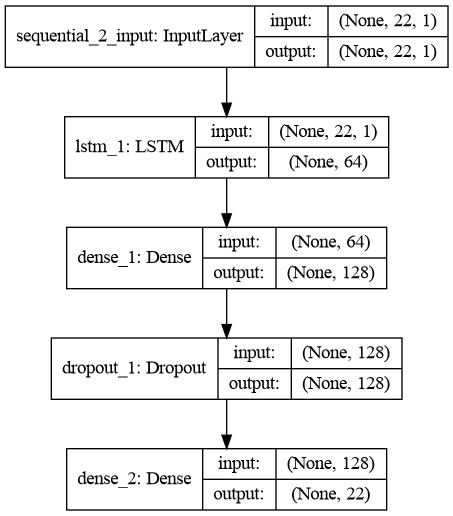

In [129]:
from IPython.display import Image
import pydot

keras.utils.plot_model(model, to_file=f'modelplot.png', show_shapes=True)

Image(f'modelplot.png')

In [10]:
model.train(csv_data)

AttributeError: 'Sequential' object has no attribute 'train'